In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
y = df.iloc[:,0:4]

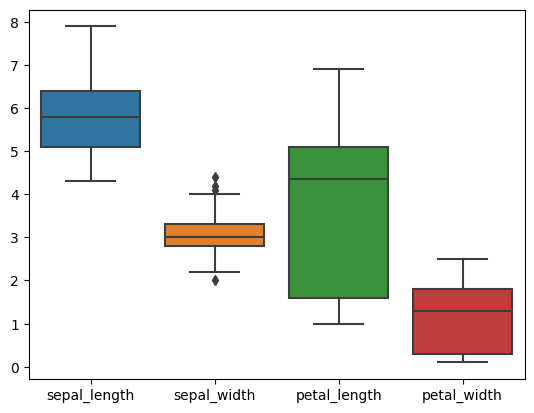

In [7]:
sns.boxplot(y)
plt.show()

## From the above data we can clearly see that There is no outliers except in "sepal_width"
## so let's figure out sepal_width

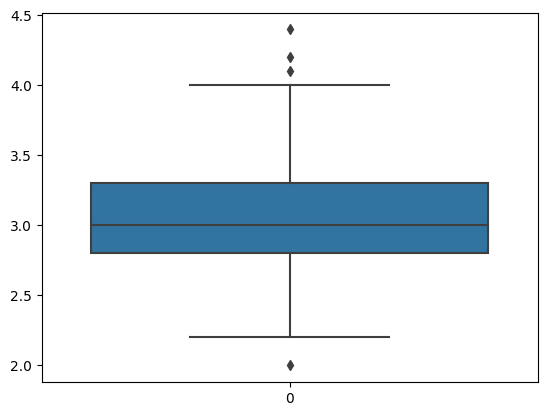

In [8]:
sns.boxplot(df['sepal_width'])
plt.show()

In [9]:
# In this we can clearly see that the difference in the data what different type of numeric values are present in "iris" data set "sepal_width"
df['sepal_width'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [10]:
df['sepal_width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [11]:
# Calculate the lower and upper quartiles for outlier detection
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)

In [12]:
# This will help in knowing the co-relation between each column or Help in knowing the relationship between each column
df.corr()

/tmp/ipykernel_20/6892744.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [13]:
# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [14]:
# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
# Identify the outlier values
outliers = df[(df['sepal_width'] < lower_bound) | (df['sepal_width'] > upper_bound)]['sepal_width']
outliers

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64

In [16]:
# Print the outlier values
print("Outlier values:")
print(outliers)

Outlier values:
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64


In [17]:
df['sepal_width'].loc[[15,32,33,60]]

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64

In [18]:
# Now lets check the median of "sepal_width"
median_value = df['sepal_width'].median()

In [19]:
# Replace the outliers with the median value
df.loc[(df['sepal_width'] < lower_bound) | (df['sepal_width'] > upper_bound), 'sepal_width'] = median_value

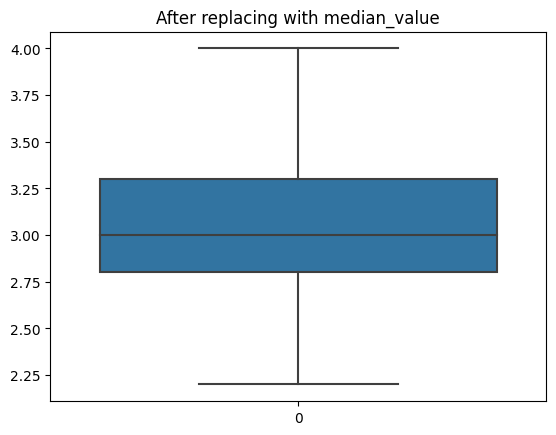

In [20]:
sns.boxplot(df['sepal_width'])
plt.title("After replacing with median_value")
plt.show()

## Now lets perform the EDA (Explotary Data Analysis)

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<AxesSubplot: ylabel='count'>

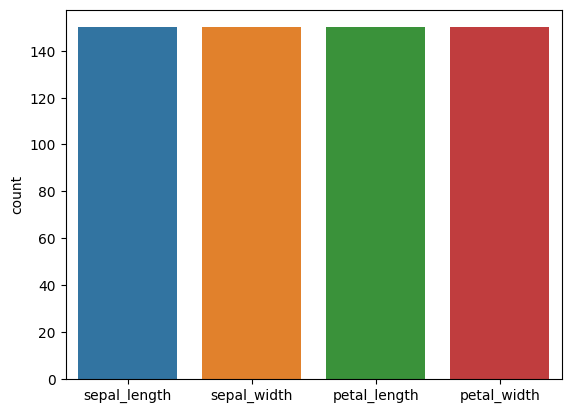

In [22]:
sns.countplot(df[['sepal_length','sepal_width','petal_length','petal_width']])

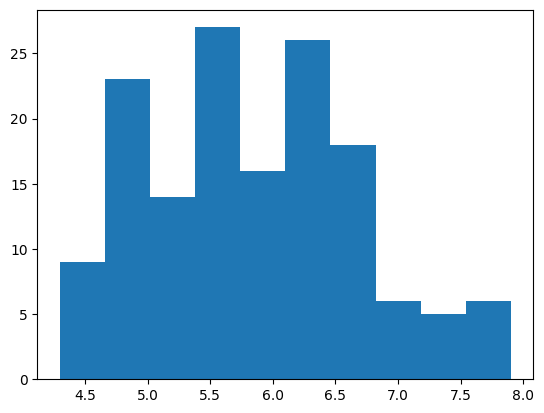

In [23]:
plt.hist(df['sepal_length'])
plt.show()

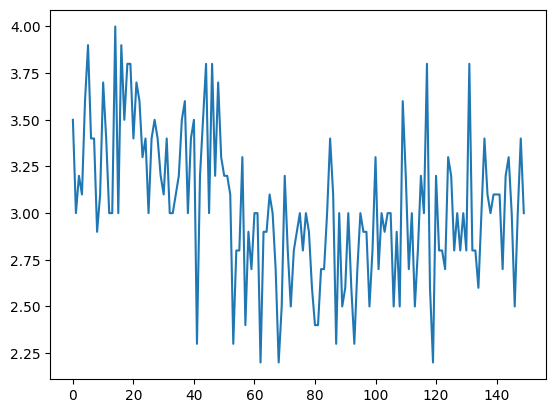

In [24]:
plt.plot(df['sepal_width'])
plt.show()

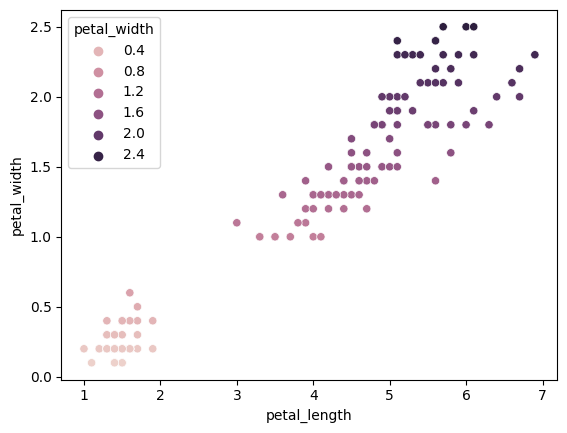

In [25]:
sns.scatterplot(x=df['petal_length'],y=df['petal_width'],hue=df['petal_width'])
plt.show()

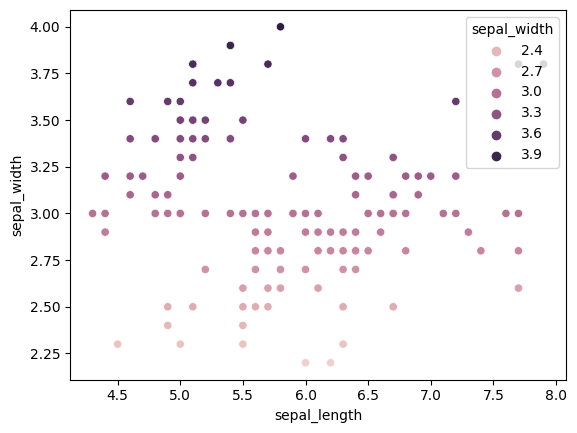

In [26]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['sepal_width'])
plt.show()

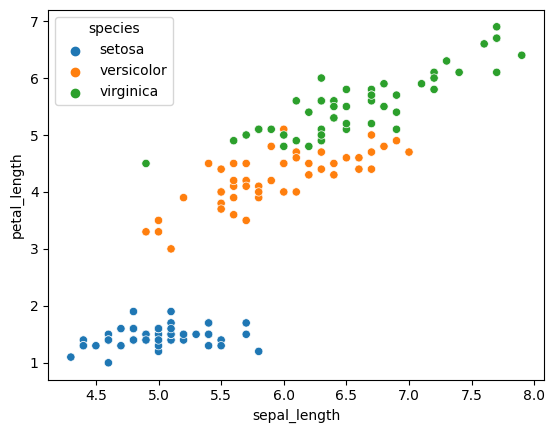

In [27]:
sns.scatterplot(x="sepal_length",y="petal_length",data=df,hue='species')
plt.show()

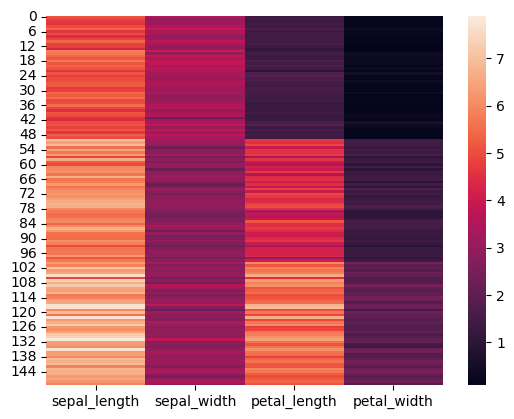

In [28]:
sns.heatmap(df.iloc[:,0:4])
plt.show()

/tmp/ipykernel_20/729757500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:,0:4])


<AxesSubplot: ylabel='Density'>

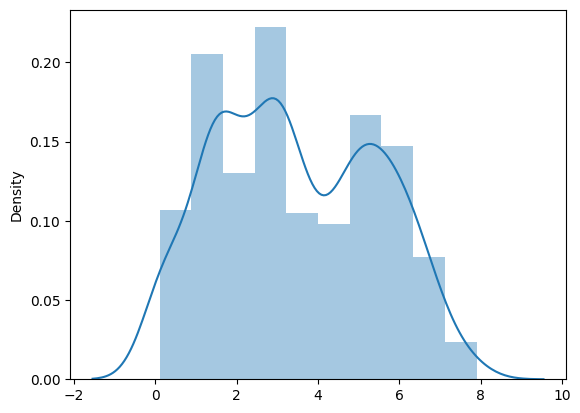

In [29]:
sns.distplot(df.iloc[:,0:4])

## It does not required any logrithmic function 

## Now lets perform the Machine Learning operation's

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# Now lets divide the column's differently
x = df.iloc[:,0:4]
y = df['species']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# In this we are assigning the 30% of the data for training purposes
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [35]:
y_test.head()

73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

## Now lets perform Feature Engineering operations

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# Create an instance of StandardScaler
scaler = StandardScaler()

In [38]:
# Fit the scaler on the training data
scaler.fit(x_train)

# Apply the scaler to transform the training and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Now lets perform the ML operation's

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

## Make prediction on the Test Data

In [41]:
y_pred = model.predict(x_test_scaled)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

## Now lets check the accuracy of the model

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Now lets check the cross val score

In [44]:
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
logreg = LogisticRegression()

# Perform cross-validation and calculate accuracy
scores = cross_val_score(logreg, x_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validated Accuracy Scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validated Accuracy Scores: [0.95238095 0.9047619  0.95238095 1.         0.95238095]
Mean Accuracy: 0.9523809523809523
